In [1]:
import nibabel as nib
import os
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
from PIL import Image
from matplotlib import cm
import pandas as pd
import imblearn
import re

In [3]:
# Setting paths for different folders
FLAIR_scan = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Normalised\FLAIRinT1space_withLacunes_35.tar'
T1_Lacunes_Incorrect = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\lacune_T1space.tar'
T1_Lacunes_Correct = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\lacune_T1space_JiyangCorrected20210920'
T1_scan = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Normalised\T1_withLacunes_35.tar'
T1_Soft_Tissue = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Normalised\T1softTiss_withLacunes_35.tar'
T1_Soft_Tissue_Mask = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\T1softTissMask_withLacunes_35.tar'
T1_Soft_Tissue_Binary_Mask = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\T1softTissMask_withLacunes_35_binary.tar'

In [4]:
#Read all data into list
T1_scan_data = []
for file in os.listdir(T1_scan):
    if file.endswith(".nii.gz"):
        Data_list = []
        file_id = int(re.search(r'\d+', file)[0])
        imgpath = os.path.join(T1_scan, file)
        img = nib.load(imgpath)
        data = img.get_fdata()
        Data_list.append(file_id)
        Data_list.append(data)
        T1_scan_data.append(Data_list)

In [5]:
#Read all FLAIR data into list
FLAIR_scan_data = []
for file in os.listdir(FLAIR_scan):
    if file.endswith(".nii.gz"):
        Data_list = []
        file_id = int(re.search(r'\d+', file)[0])
        imgpath = os.path.join(FLAIR_scan, file)
        img = nib.load(imgpath)
        data = img.get_fdata()
        Data_list.append(file_id)
        Data_list.append(data)
        FLAIR_scan_data.append(Data_list)

In [6]:
#Lacune Exists
Lacune_indicator_data = []
for file in os.listdir(T1_Lacunes_Correct):
    if file.endswith(".nii.gz"):
        Data_list = []
        file_id = int(re.search(r'\d+', file)[0])
        imgpath = os.path.join(T1_Lacunes_Correct, file)
        img = nib.load(imgpath)
        data = img.get_fdata()
        Data_list.append(file_id)
        Data_list.append(data)
        Lacune_indicator_data.append(Data_list)

In [7]:
Soft_tiss_data = []
for file in os.listdir(T1_Soft_Tissue):
    if file.endswith(".nii.gz"):
        Data_list = []
        file_id = int(re.search(r'\d+', file)[0])
        imgpath = os.path.join(T1_Soft_Tissue, file)
        img = nib.load(imgpath)
        data = img.get_fdata()
        Data_list.append(file_id)
        Data_list.append(data)
        Soft_tiss_data.append(Data_list)

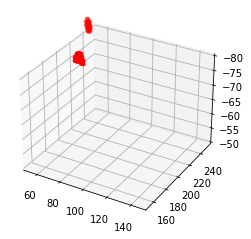

In [8]:
# Histogram of all values
img = nib.load(r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\lacune_T1space_JiyangCorrected20210920\0046_lacuneT1space.nii.gz')
data = img.get_fdata()
x,y,z = data.nonzero()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= 'red', s= 10)
ax.set_xlim(50, 150)
ax.set_ylim(150, 256)
ax.set_zlim(-50, -80)
plt.savefig("demo.png")

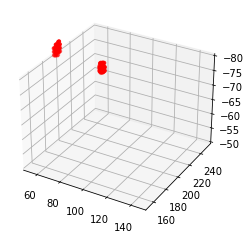

In [9]:
# Histogram of all values
img = nib.load(r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\lacune_T1space_JiyangCorrected20210920\0046_lacuneT1space.nii.gz')
data = img.get_fdata()
data = np.rot90(data, axes=(0,1))
x,y,z = data.nonzero()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= 'red', s= 10)
ax.set_xlim(50, 150)
ax.set_ylim(150, 256)
ax.set_zlim(-50, -80)
plt.savefig("demo.png")